In [ ]:
import sys, os
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../.."))) #Allow for imports from src
from src.models.ML_Class_1 import Model_Tester


In [2]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=4, n_redundant=2, weights=[0.7, 0.3], class_sep=1.3, random_state=1945)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

In [3]:
model = XGBClassifier(eval_metric = 'logloss', random_state = 1945, n_jobs = -1, tree_method = 'hist')
scaler = StandardScaler()
parameter_grid = {
'n_estimators': [200, 400],
'max_depth': [3, 5, 7],
'learning_rate': [0.03, 0.1],
'subsample': [0.8, 1.0],
'colsample_bytree': [0.8, 1.0],}
cv_folds = 5


In [4]:
test = Model_Tester(model = model, scaler = scaler, parameter_grid=parameter_grid, cv_folds=cv_folds, feature_names=feature_names)
test.train_test_split(X, y, train_size=0.8, random_state=1945)
train_scores, test_scores = test.k_folds(K = 5, random_state = 1945)


Average Train Score: 1.0000 ± 0.0000
Average Test Score: 0.9674 ± 0.0019


In [ ]:
test.optimize()

4.91s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
  File "/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
TypeError: a bytes-like object is required, not 'str'



XGBClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1398
           1       0.96      0.94      0.95       602

    accuracy                           0.97      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000


ROC AUC Score: 0.9926
Matthews Correlation Coefficient (MCC): 0.9285
Balanced Accuracy: 0.9625

 XGBClassifier Plots: 




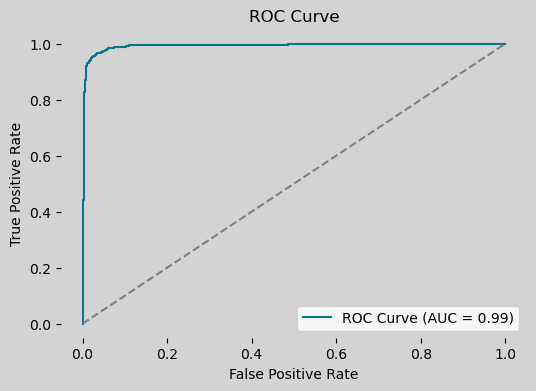

XGBClassifier Confusion Matrix:


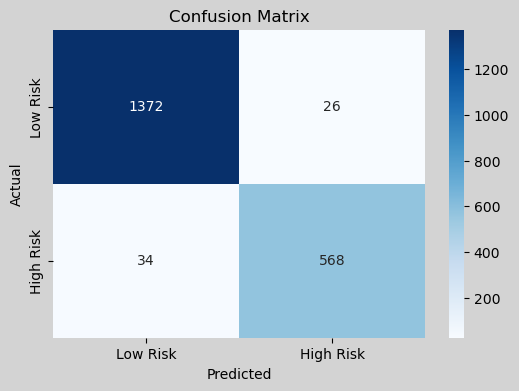

XGBClassifier Feature Importance Plot:


/Users/matthewplambeck/Desktop/Convoy Predictor/src/models/ML_Class_1.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='crest_r')


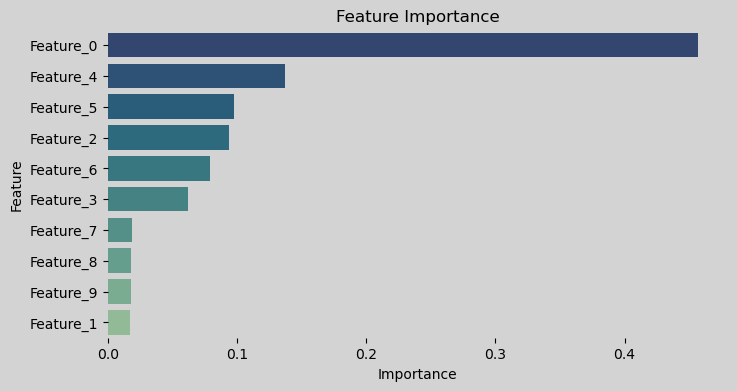

(0.9624617987728079, 0.9284784072825627, 0.9926199744295362)

In [ ]:
results = test.evaluate()
results['balanced_accuracy'], results['mcc'], results['roc_auc']

In [ ]:
best_estimator = test.best_model
#best_estimator.named_steps['model']

In [ ]:
best_estimator

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
